The following modules have been imported for the analysis 

In [1]:
#Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


The 4 data sets which is given in the assignments have been cleaned earlier and then imported as cleaned datasets in df1, df2, df3 and df4

In [2]:
df1 = pd.read_csv("C:/Users/Admin1/OneDrive/Desktop/week 2/cab_data.csv")

In [3]:
df2 = pd.read_csv("C:/Users/Admin1/OneDrive/Desktop/week 2/city_data.csv")

In [4]:
df3 = pd.read_csv("C:/Users/Admin1/OneDrive/Desktop/week 2/customer_data.csv")

In [5]:
df4 = pd.read_csv("C:/Users/Admin1/OneDrive/Desktop/week 2/transaction_data.csv")

Dataset df1 and df2 is merged on the 'City' column whereas df3 and df4 is merged on the 'Customer ID' column

In [6]:
# First Merge: df1 and df2
merged_df1_2 = df1.merge(df2, on='City', how='inner')
# Second Merge: df3 and df4
merged_df3_4 = df3.merge(df4, on='Customer ID', how='inner')


In [7]:
merged_df1_2

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885,24701
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885,24701
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885,24701
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859,127001
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859,127001
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859,127001
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859,127001


In [8]:
merged_df3_4

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


In [9]:
print(merged_df1_2.dtypes)

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
Population          int64
Users               int64
dtype: object


In [10]:
print(merged_df3_4.dtypes)

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
Transaction ID         int64
Payment_Mode          object
dtype: object


In [11]:
dups1 = merged_df1_2['Transaction ID'].duplicated() 
print(dups1.sum())

0


In [12]:
dups2 = merged_df3_4['Transaction ID'].duplicated() 
print(dups2.sum())

0


Now merged df1_2 and merged df3_4 is merged together on column 'Transaction ID' creating a final dataset of all the 4 datasets

In [13]:
merged = merged_df1_2.merge(merged_df3_4, on='Transaction ID', how='outer')

In [14]:
merged

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885.0,24701.0,29290,Male,28,10813,Card
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885.0,24701.0,27703,Male,27,9237,Card
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885.0,24701.0,28712,Male,53,11242,Cash
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885.0,24701.0,28020,Male,23,23327,Cash
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885.0,24701.0,27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10439406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23382,Female,51,18919,Card
440094,10439409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21420,Female,18,4531,Card
440095,10439413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49888,Male,23,3226,Card
440096,10439418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46456,Male,20,30662,Cash


The Nan values have been dropped 

In [15]:
merged.dropna(inplace=True)

In [16]:
merged

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885.0,24701.0,29290,Male,28,10813,Card
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885.0,24701.0,27703,Male,27,9237,Card
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885.0,24701.0,28712,Male,53,11242,Cash
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885.0,24701.0,28020,Male,23,23327,Cash
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885.0,24701.0,27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108.0,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859.0,127001.0,52392,Male,24,15651,Cash
359388,10440104,43104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859.0,127001.0,53286,Male,32,6528,Cash
359389,10440105,43105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859.0,127001.0,52265,Male,56,7966,Cash
359390,10440106,43105.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859.0,127001.0,52175,Male,32,6423,Card


In [17]:
#Excel stores dates as numbers - days since a origin date. Common origins are 1900-01-01 or 1904-01-01. To find correct origin take sample date number
#Subtract days between each origin and 1900-01-01. Convert results to dates. Compare dates to actual data. Whichever result is closest is the right origin
#e.g. Date 42377. 1900 origin= 42377 - 0 days = 42377 (2016 date)
#1904 origin = 42377 - 1461 days = 40916 (2010 date)
#Since actual data is 2016-2018,
#1900-01-01 is correct origin
merged['Date of Travel'] = pd.to_datetime(merged['Date of Travel'], unit='D', origin='1900-01-01')

In [18]:
merged

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885.0,24701.0,29290,Male,28,10813,Card
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885.0,24701.0,27703,Male,27,9237,Card
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885.0,24701.0,28712,Male,53,11242,Cash
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885.0,24701.0,28020,Male,23,23327,Cash
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885.0,24701.0,27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859.0,127001.0,52392,Male,24,15651,Cash
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859.0,127001.0,53286,Male,32,6528,Cash
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859.0,127001.0,52265,Male,56,7966,Cash
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859.0,127001.0,52175,Male,32,6423,Card


Column names have been renamed

In [19]:
merged = merged.rename(columns = {'Date of Travel' : 'Date_of_Travel', 'Transaction ID' : 'Transaction_ID', 'KM Travelled' : 'KM_Travelled', 'Price Charged' : 'Price_Charged', 'Cost of Trip': 'Cost_of_Trip', 'Customer ID' : 'Customer_ID'})

In [20]:
merged.Company.unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [21]:
merged.City.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [22]:
merged.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [23]:
merged.Payment_Mode.unique()

array(['Card', 'Cash'], dtype=object)

Outlier Detection by using IsolationForest 

In [24]:
#First identified the string columns and used the encoder to convert to numbers this allows fitting the model on mix of data types. Created the 
#IsolationForest model and set the parmeters number of trees and lastly fitted on mix of numeric and encoded columns.

In [25]:


# Get categorical columns
cat_cols = ['Date_of_Travel', 'Company', 'City', 'Gender', 'Payment_Mode']  

# Create ordinal encoder
enc = OrdinalEncoder()

# Fit and transform categorical columns
merged[cat_cols] = enc.fit_transform(merged[cat_cols])


In [26]:


# Create model 
model = IsolationForest(n_estimators=100)

# Fit model
model.fit(merged)  



IsolationForest()

In [27]:
#The model generated outliers scores for each rows. Higher scores means more normal and lower score means more outliers. Picked the percentage of 
#Expected outliers then set the cutoff score based on percentage. The rows with scores below cutoff are classified as outliers.

In [28]:
scores = model.decision_function(merged)

In [29]:
y_pred = model.predict(merged)

In [30]:
outliers_fraction = 0.1 
threshold = np.percentile(scores, 100 - outliers_fraction*100)
outliers = merged[scores < threshold]

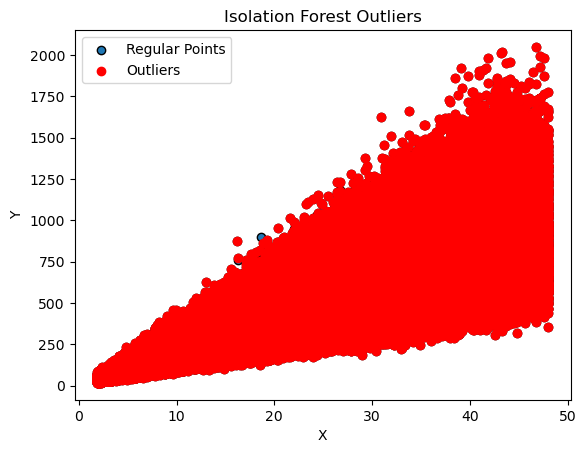

In [31]:
#Trying to plot the whole data of column KM Travelled and Price Charged 

# Scatter plot full data
plt.scatter(merged['KM_Travelled'], merged['Price_Charged'], edgecolor='black')

# Scatter plot outliers in red
plt.scatter(outliers['KM_Travelled'], outliers['Price_Charged'], color='red',edgecolor='red') 

# Customize plot  
plt.title('Isolation Forest Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Regular Points', 'Outliers'])

plt.show()

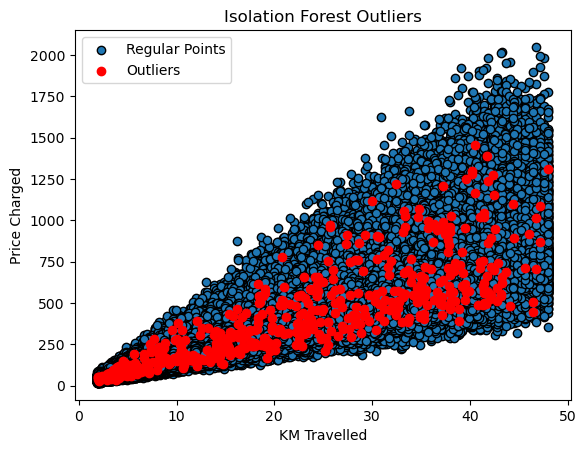

In [32]:
#Plotted the data of columns KM Travelled and Price Charged by taking a sample of 500 for better understanding and visuals of the data and the outliers

# Scatter plot full data
plt.scatter(merged['KM_Travelled'], merged['Price_Charged'], edgecolor='black')


# Scatter plot outliers in red
sample_outliers = outliers.sample(500)

plt.scatter(sample_outliers['KM_Travelled'], sample_outliers['Price_Charged'], color='red') 

# Customize plot  
plt.title('Isolation Forest Outliers')
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged')
plt.legend(['Regular Points', 'Outliers'])

plt.show()


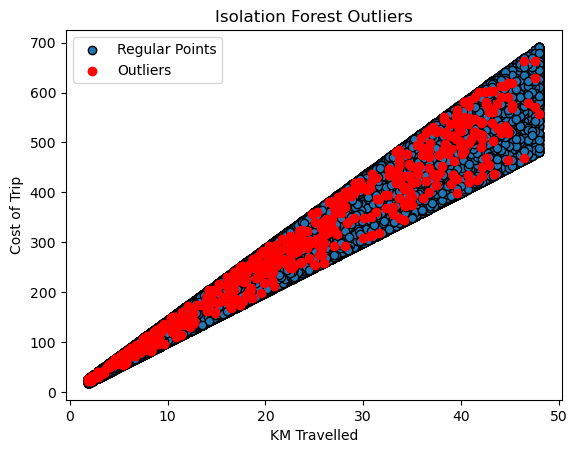

In [33]:
#Plotted the data of columns KM Travelled and Cost of trip by taking a sample of 500 for better understanding and visuals of the data and the outliers

# Scatter plot full data
plt.scatter(merged['KM_Travelled'], merged['Cost_of_Trip'], edgecolor='black')


# Scatter plot outliers in red
sample_outliers = outliers.sample(500)

plt.scatter(sample_outliers['KM_Travelled'], sample_outliers['Cost_of_Trip'], color='red') 

# Customize plot  
plt.title('Isolation Forest Outliers')
plt.xlabel('KM Travelled')
plt.ylabel('Cost of Trip')
plt.legend(['Regular Points', 'Outliers'])

plt.show()


c:\Users\Admin1\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


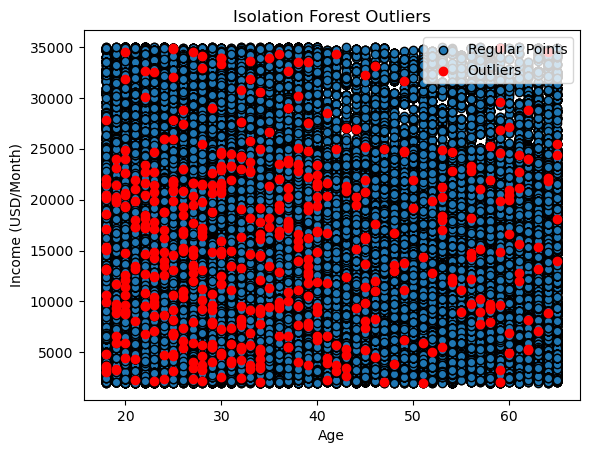

In [34]:
#Plotted the data of columns age and income (USD/Month) by taking a sample of 500 for better understanding and visuals of the data and the outliers

# Scatter plot full data
plt.scatter(merged['Age'], merged['Income (USD/Month)'], edgecolor='black')


# Scatter plot outliers in red
sample_outliers = outliers.sample(500)

plt.scatter(sample_outliers['Age'], sample_outliers['Income (USD/Month)'], color='red') 

# Customize plot  
plt.title('Isolation Forest Outliers')
plt.xlabel('Age')
plt.ylabel('Income (USD/Month)')
plt.legend(['Regular Points', 'Outliers'])

plt.show()


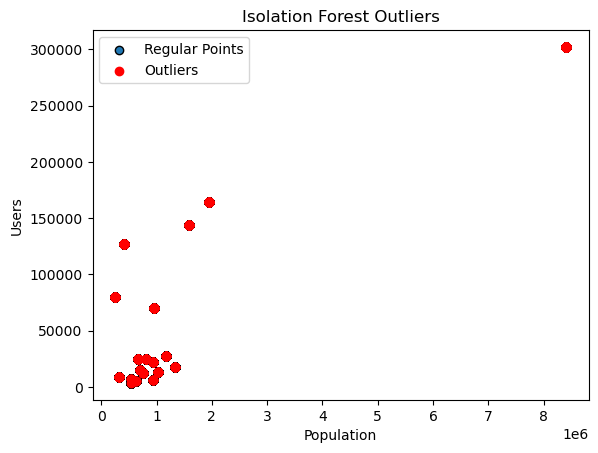

In [35]:
#Plotted the data of columns population and users by taking a sample of 500 for better understanding and visuals of the data and the outliers

# Scatter plot full data
plt.scatter(merged['Population'], merged['Users'], edgecolor='black')


# Scatter plot outliers in red
sample_outliers = outliers.sample(500)

plt.scatter(sample_outliers['Population'], sample_outliers['Users'], color='red') 

# Customize plot  
plt.title('Isolation Forest Outliers')
plt.xlabel('Population')
plt.ylabel('Users')
plt.legend(['Regular Points', 'Outliers'])

plt.show()


In [36]:
# invert outliers mask to filter original dataframe 
mask = ~merged.index.isin(outliers.index)

# apply mask to filter 
merged_cleaned = merged[mask]

<Figure size 640x480 with 0 Axes>

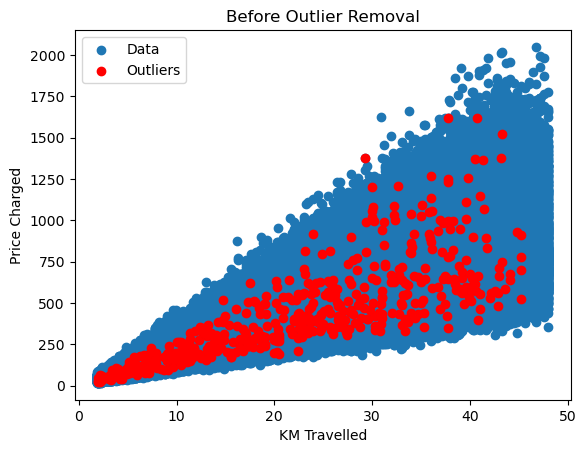

<Figure size 640x480 with 0 Axes>

In [37]:

# Scatter plot before cleaning 
plt.scatter(merged['KM_Travelled'], merged['Price_Charged'])

# Overlay outliers
sample_outliers = outliers.sample(500)
plt.scatter(sample_outliers['KM_Travelled'], sample_outliers['Price_Charged'], color='red')

plt.title('Before Outlier Removal')
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged')
plt.legend(['Data', 'Outliers'])

plt.figure() 



In [38]:
#The outliers have been identified in the above steps now to remove them I took index of outliers rows and inverted it to create a opposite mask. 
#Opposite mask is converted the outlier rows into boolean mask (true/false) so now to filter out the outliers just select the opposite of the mask;
#Mask that selects the non-outliers. The mask is true for the non outliers, used the mask to filter out the original data and then kept only the non
#Outlier rows.

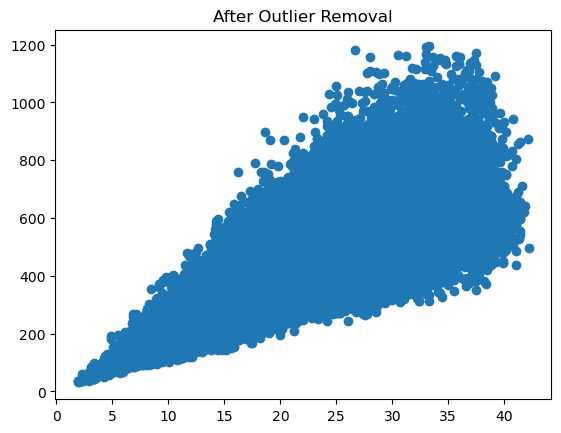

In [39]:
# Scatter plot after cleaning
plt.scatter(merged_cleaned['KM_Travelled'], merged_cleaned['Price_Charged'])

plt.title('After Outlier Removal')

# Show plots
plt.show()

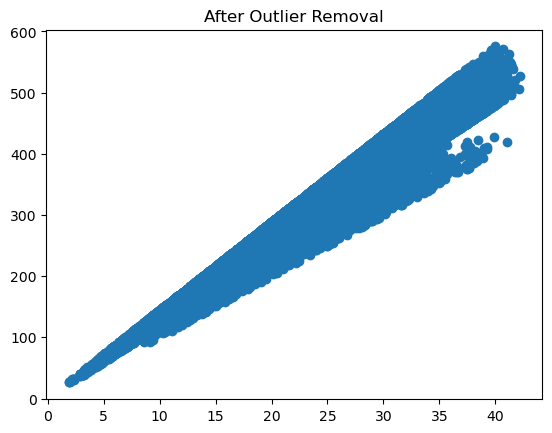

In [40]:
# Scatter plot after cleaning
plt.scatter(merged_cleaned['KM_Travelled'], merged_cleaned['Cost_of_Trip'])

plt.title('After Outlier Removal')

# Show plots
plt.show()

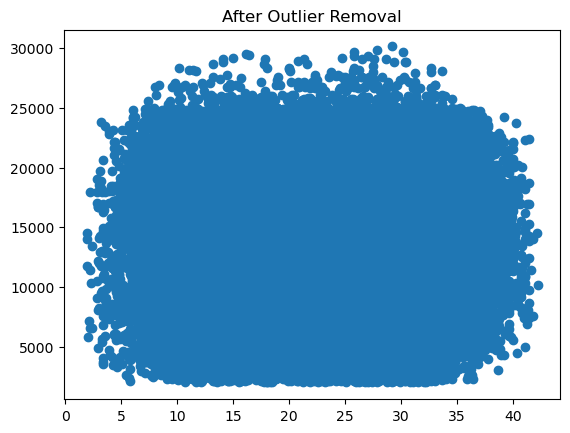

In [41]:
# Scatter plot after cleaning
plt.scatter(merged_cleaned['KM_Travelled'], merged_cleaned['Income (USD/Month)'])

plt.title('After Outlier Removal')

# Show plots
plt.show()

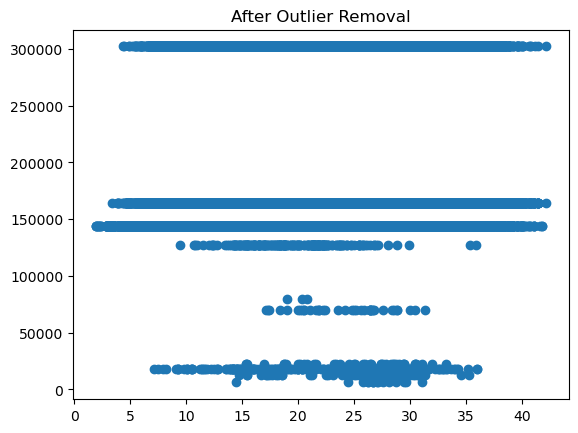

In [42]:
# Scatter plot after cleaning
plt.scatter(merged_cleaned['KM_Travelled'], merged_cleaned['Users'])

plt.title('After Outlier Removal')

# Show plots
plt.show()

In [43]:
merged

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,6.0,0.0,0.0,30.45,370.95,313.6350,814885.0,24701.0,29290,1.0,28,10813,0.0
1,10000012,4.0,0.0,0.0,28.62,358.52,334.8540,814885.0,24701.0,27703,1.0,27,9237,0.0
2,10000013,0.0,0.0,0.0,9.04,125.20,97.6320,814885.0,24701.0,28712,1.0,53,11242,1.0
3,10000014,5.0,0.0,0.0,33.17,377.40,351.6020,814885.0,24701.0,28020,1.0,23,23327,1.0
4,10000015,1.0,0.0,0.0,8.73,114.62,97.7760,814885.0,24701.0,27182,1.0,33,8536,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,737.0,1.0,18.0,4.80,69.24,63.3600,418859.0,127001.0,52392,1.0,24,15651,1.0
359388,10440104,733.0,1.0,18.0,8.40,113.75,106.8480,418859.0,127001.0,53286,1.0,32,6528,1.0
359389,10440105,734.0,1.0,18.0,27.75,437.07,349.6500,418859.0,127001.0,52265,1.0,56,7966,1.0
359390,10440106,734.0,1.0,18.0,8.80,146.19,114.0480,418859.0,127001.0,52175,1.0,32,6423,0.0


Hypothesis 

Which company has maximum cab users at a particular time period?

In [45]:
#Cab user 1 indicate yellow cab 

In [46]:
df = pd.DataFrame(merged)

# Group by Company and sum Users for a particular time period
company_users = df.groupby('Company')['Users'].sum()

# Find the company with maximum cab users
max_users_company = company_users.idxmax()
max_users_count = company_users[max_users_company]

print(f"The company with maximum cab users is {max_users_company} with {max_users_count} users.")

The company with maximum cab users is 1.0 with 46276399954.0 users.


Does margin proportionally increase with increase in number of customers?

Correlation Analysis

Performing the correlation analysis between the 'Users' (number of customers) and the margin (calculated as 'Price_Charged' minus 'Cost_of_Trip'). 

In [49]:
df = pd.DataFrame(merged)

# Calculate the margin
df['Margin'] = df['Price_Charged'] - df['Cost_of_Trip']

# Calculate the correlation between Users and Margin
correlation = df['Users'].corr(df['Margin'])

print(f"The correlation between Users and Margin is: {correlation}")

The correlation between Users and Margin is: 0.4577576722574383


The correlation coefficient value of 0.4577576722574383 indicates a positive correlation between the 'Users' and 'Margin' columns. 
However, the correlation is not very strong, which means that while there is a relationship between these two variables, it's not a perfect linear relationship.

What are the attributes of these customer segments?

K-Means Clustering Analysis 

For the customer segmentation, K-Means Clustering analysis have been done. K-Means clustering means groupping the customers into clusters based on similarity of attributes.

In [51]:
# relevant features for clustering
features = ['KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'Users', 'Age', 'Income (USD/Month)']

# Prepare the feature matrix
X = merged[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
#Choose the number of clusters (K)
# Elbow Method is used to find the optimal K

#Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

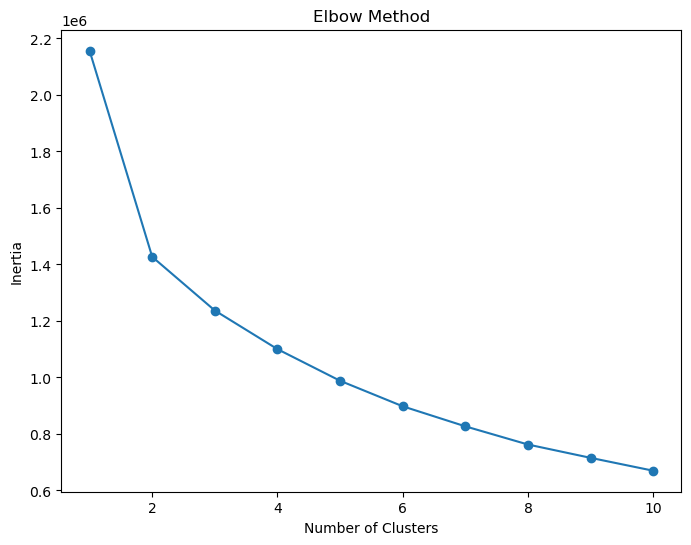

In [53]:
# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


The Elbow is forming at point 2 so k = 2 has been taken 

In [54]:
# Apply K-Means with the chosen K (2 clusters)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
merged['Cluster'] = clusters


In [55]:
# Analyze the characteristics of each cluster
cluster_attributes = merged.groupby('Cluster').mean()


In [64]:
cluster_attributes

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Gender,Age,Income (USD/Month),Payment_Mode,Margin
Cluster,,,,,,,,,,,,,,,
0,1.021930e+07,589.177255,0.800977,8.411929,33.327473,641.264656,424.932172,3.408859e+06,166410.475617,18238.321683,0.574759,35.312164,15067.250595,0.400817,216.332484
1,1.022213e+07,596.688707,0.730156,8.341149,12.553839,220.739673,157.077329,2.874738e+06,150879.037947,20078.817454,0.571257,35.359543,15031.674236,0.399944,63.662344


Higher 'KM_Travelled' and 'Price_Charged' values could indicate customers who travel longer distances and are charged higher prices for their trips.
Lower 'KM_Travelled' and 'Price_Charged' values might correspond to customers who travel shorter distances and are charged lower prices.

Red Cluster (0 to 10 on x-axis):
Customers in this cluster predominantly travel shorter distances (0 to 10 KM_Travelled). This could indicate a group of customers who use the service for short trips, such as local commuting. They might be charged lower prices ('Price_Charged') due to the shorter distances.


Blue Cluster (25 to 35 on x-axis):
Customers in this cluster primarily travel distances in the range of 25 to 35 ('KM_Travelled'). This range might correspond to moderately long distances, such as intercity travel or longer commutes. They could be charged relatively higher prices ('Price_Charged') compared to shorter trips due to the longer distances.

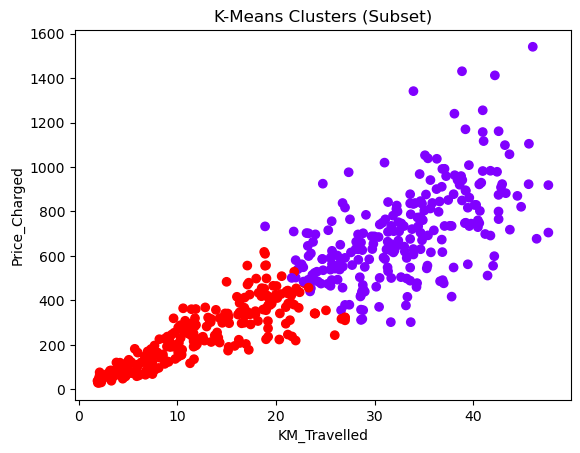

In [56]:
plt.scatter(merged['KM_Travelled'][:500], merged['Price_Charged'][:500], c=merged['Cluster'][:500], cmap='rainbow')
plt.xlabel('KM_Travelled')
plt.ylabel('Price_Charged')
plt.title('K-Means Clusters (Subset)')
plt.show()


Points are spread out across various combinations of 'Price_Charged' and 'Cost_of_Trip', regardless of cluster assignment.
There is no clear linear or systematic relationship between 'Price_Charged' and 'Cost_of_Trip' based on the visualization.

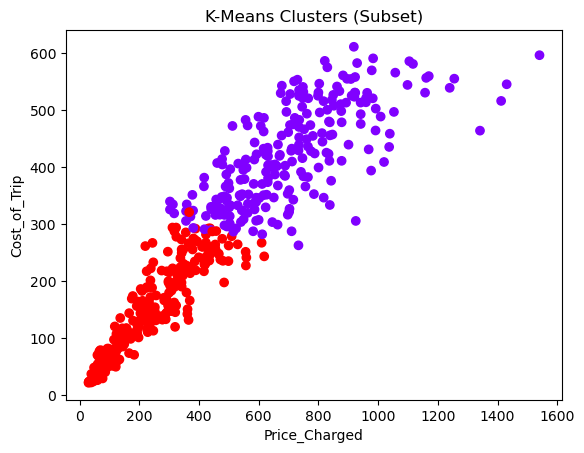

In [62]:
plt.scatter(merged['Price_Charged'][:500], merged['Cost_of_Trip'][:500], c=merged['Cluster'][:500], cmap='rainbow')
plt.xlabel('Price_Charged')
plt.ylabel('Cost_of_Trip')
plt.title('K-Means Clusters (Subset)')
plt.show()


The proximity of the clusters in their respective colors could indicate that there are similarities in the 'KM_Travelled' and 'Cost_of_Trip' values within each cluster. However, the clusters remain separate from each other.
The separation between clusters suggests that the K-Means algorithm has been relatively successful in capturing distinct groupings of data points based on these two features.

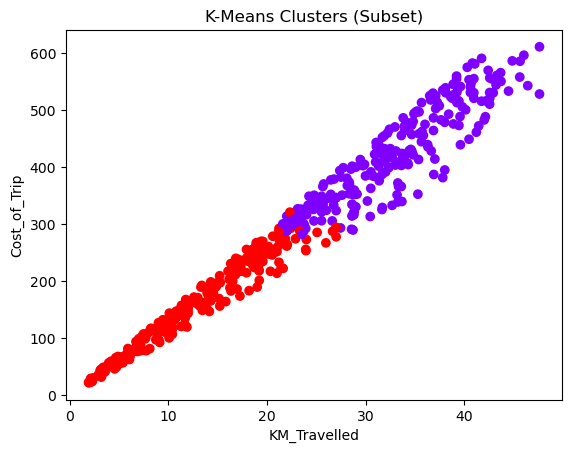

In [59]:
plt.scatter(merged['KM_Travelled'][:500], merged['Cost_of_Trip'][:500], c=merged['Cluster'][:500], cmap='rainbow')
plt.xlabel('KM_Travelled')
plt.ylabel('Cost_of_Trip')
plt.title('K-Means Clusters (Subset)')
plt.show()
